## 6.임베딩 내 편향성 알아보기

### ****6-1. 들어가며****

****인공지능은 객관적일까?****

**데이터 편향성**

**'**차량 충돌 사고 실험' - 여성 탑승자가 남성 탑승자보다 사망률이 높아. 차량 실험에서 쓰인 데이터가 남성 위주

아마존  인공지능 채용 시스템  - 여성'이라는 단어가 포함되면 감점. 남성 우위인 기술산업 업계.

'콤파스'라는 범죄자의 형량을 정하는 알고리즘 - 이 알고리즘은 범죄 방식, 생활 방식, 성격, 태도 등의 점수를 환산해 범죄자의 재범률을 예측하는 시스템. 인의 재범 가능성을 백인보다 2배 위험하다고 판단. 재범을 저지른 흑인은 체포될 확률이 백인에 비해 높았기 때문 

Word Embedding Association Test (WEAT) - 워드 임베딩에 숨어 있는 편향성을 측정하는 대표적인 방법

### ****6-2. 워드 임베딩의 편향성****

****워드 임베딩 속의 편향성****

[1607.06520.pdf (arxiv.org)](https://arxiv.org/pdf/1607.06520.pdf)

Programmer, Doctor, Engineer 등의 단어는 남성대명사 He에 가깝게, Homemaker, Nurse, Hairdresser 등의 단어는 여성대명사 She에 가깝게 위치

daddy와 boys는 중립적인 단어?

****WEAT(Word Embedding Association Test)****

2016년에 Aylin Caliskan이 제안.  Word Embedding Association Test (WEAT)는 임베딩 모델의 편향을 측정하는 방식

**[Semantics derived automatically from language corpora necessarily contain human biases](https://arxiv.org/pdf/1608.07187.pdf)**

Male과 Female, Science와 Art라는 개념을 가장 잘 대표하는 단어들을 여러 개 골라 단어 셋(set)을 만듬

Science를 대표하는 target 단어 셋 X

Art를 대표하는 target 단어 셋 Y

Male을 대표하는 attribute 단어 셋 A

Female을 대표하는 attribute 단어 셋 B

편향성이 없다면, X에 속한 단어들은 A에 속한 단어들과의 거리와 B에 속한 단어들과의 거리가 별 차이가 없어야

WEAT 개념의 아이디어는 심리학의 IAT(Implicit Association Test)라는 인지편향성 실험 구조에서 따온 것

**IAT 홈페이지 : [Project Implicit](https://implicit.harvard.edu/implicit/education.html)**

아래 표는 구글의 테크블로그에서 WEAT 개념을 소개하면서 첨부한 실험 결과표

**[Text Embedding Models Contain Bias. Here's Why That Matters](https://developers.googleblog.com/2018/04/text-embedding-models-contain-bias.html)**

Glove, Word2Vec 등 다양한 워드 임베딩 모델에 대해 동일한 실험을 하여 WEAT score를 측정해 본 결과 모델마다 WEAT score가 동일하게 나오는 것이 아님

### ****6-3. WEAT를 통한 편향성 측정****

WEAT score는 다음과 같이 정의

$$
{mean_{x∈X}s(x,A,B)−mean_{y∈Y}s(y,A,B)}\over{std_{w∈X∪Y}s(w,A,B)}
$$

$$
s(w,A,B)=mean_{a∈A}cos(w^→,a^→)−mean_{b∈B}cos(w^→,b^→)
$$

**target X, Y에 속하는 각 단어 *x*, *y*들이 개념축 A-B에 대해 가지는 편향성을  각각 평균 내서** 

### ****6-4. WEAT 구현하기****

In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

두 개의 target 단어 셋 X, Y

두 개의 attribute 단어 셋 A, B

두 개의 target 셋의 크기가 같다

두 개의 attribute 셋의 크기가 같다

targets
X set(꽃) : 장미, 튤립, 백합, 데이지
Y set(곤충) : 거미, 모기, 파리, 메뚜기

attributes
A set(유쾌) : 사랑, 행복, 웃음
B set(불쾌) : 재난, 고통, 증오

두 개의 target 단어 셋 X, Y

두 개의 attribute 단어 셋 A, B

두 개의 target 셋의 크기가 같다

두 개의 attribute 셋의 크기가 같다

targets
X set(꽃) : 장미, 튤립, 백합, 데이지
Y set(곤충) : 거미, 모기, 파리, 메뚜기

attributes
A set(유쾌) : 사랑, 행복, 웃음
B set(불쾌) : 재난, 고통, 증오

In [2]:
target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

In [3]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [4]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [5]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


In [6]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B))

0.6457646122337399


In [7]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [8]:
print(s(target_Y['거미'], A, B))

-0.794002342033094


In [9]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


In [10]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


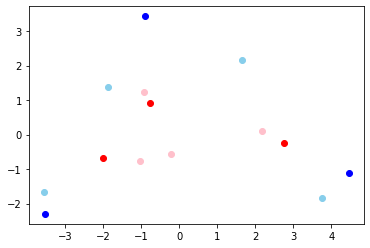

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

### ****6-5. 사전학습된 Word Embedding에 WEAT 적용****

구글에서 학습한 모델 압축을 풀면 대략 3G 정도 됩니다.

**[GoogleNews-vectors-negative300.bin.gz](https://drive.google.com/u/0/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&export=download)**

In [12]:
# $ mkdir -p ~/aiffel/weat
# $ ln -s ~/data/* ~/aiffel/weat/
# $ cd ~/aiffel/weat
# $ ls -l

w2v를 사용하다가 메모리 부족이 발생할 수 있습니다. 이때는 워드 임베딩 내 300만 개의 단어 중 자주 쓰는 단어 50만 개만 꺼내어 사용하도록 아래와 같이 limit
 파라미터값을 주면 메모리 사용량을 크게 줄일 수 있습니다.

In [13]:
import os

# data_dir = '~/aiffel/weat' 
# model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')
 

from pathlib import Path
data_dir = Path.joinpath(Path.cwd(),'data')
model_dir = Path.joinpath(data_dir,'GoogleNews-vectors-negative300.bin')


from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

In [14]:
w2v
#<gensim.models.keyedvectors.KeyedVectors at 0x7fcadb59dd00>

2021년 3월, Gensim이 4.0 으로 버전업되면서 KeyedVectors에 vocab dict가 제거되었습니다. 상세한 내용은 아래 링크를 참고해 주세요.

**[Migrating from Gensim 3.x to 4](https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4)**

In [15]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. 
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
print(w2v.vectors.shape)
#500000
#300
#(500000, 300)

500000
300
(500000, 300)


In [16]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [17]:
# 'happy'와 가장 유사한 단어
w2v.most_similar(positive=['happy'])

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [18]:
w2v.most_similar(positive=['family'])

[('relatives', 0.6662653088569641),
 ('familiy', 0.6517067551612854),
 ('families', 0.6252894997596741),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065612435340881),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.5762072205543518),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

In [19]:
w2v.most_similar(positive=['school'])

[('elementary', 0.7868632078170776),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529811024665833),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301522850990295),
 ('classroom', 0.6281620264053345),
 ('Schools', 0.6172096133232117)]

In [20]:
target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)
#1.2624874

1.2624874

In [21]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_B = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)
#1.6909266

1.6909266

인스턴트 식품의 예시와 인스턴트를 의미하는 단어가 가까움

In [22]:
target_X = ['Russian', 'forces',  'missile', 'strikes',  'Ukraine',  'Kharkiv', 'President']
target_Y = ['Persians', 'Alexander',  'Greek', 'culture', 'Roman', 'province', 'Christians']
attribute_A = ['LNG',  'pipelines',  'gas', 'liquid',  'ships', 'cubic', 'meters', 'Europe', 'Atlantic']
attribute_B = ['red', 'carpet', 'Tokyo', 'Edition', 'Hotel', 'Koizumi', 'sculptural', 'ballgowns', 'suit']
    
X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)
#0.86

0.8629204

In [23]:
target_X = ['Russian', 'forces',  'missile', 'strikes',  'Ukraine',  'Kharkiv', 'President']
target_Y = ['Persians', 'Alexander',  'Greek', 'culture', 'Roman', 'province', 'Christians']
attribute_A = ['LNG',  'pipelines',  'gas', 'liquid',  'ships', 'cubic', 'meters', 'Europe', 'Atlantic']
attribute_B = ['red', 'carpet', 'Tokyo', 'Edition', 'Hotel', 'Koizumi', 'sculptural', 'ballgowns', 'suit']
    
X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

0.8629204

In [24]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


### ****6-6. 직접 만드는 Word Embedding에 WEAT 적용(1)****

형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기
추출된 결과로 embedding model 만들기
TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기
embedding model과 단어 셋으로 WEAT score 구해보기

****1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기****

synopsis.txt(대략 17MB) - 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보

In [25]:
# $ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/synopsis.zip
# $ mv synopsis.zip ~/aiffel/weat
# $ cd ~/aiffel/weat && unzip synopsis.zip

In [26]:
import os

synopsis_dir = Path.joinpath(data_dir,'synopsis.txt')

# with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
with open(synopsis_dir, 'r', encoding='UTF-8') as file:

    for i in range(20):        
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [27]:
# $ pip install konlpy

In [28]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []

# with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
with open(synopsis_dir, 'r', encoding='UTF-8') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

print("슝~")

슝~


In [29]:
print(len(tokenized))

71156


2. 추출된 결과로 embedding model 만들기

In [30]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  

model = Word2Vec.load("word2vec.model")


model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.8913386464118958),
 ('다큐멘터리', 0.8423609137535095),
 ('영화로', 0.8113700151443481),
 ('드라마', 0.8073851466178894),
 ('영상', 0.7853281497955322),
 ('감동', 0.7805281281471252),
 ('주제', 0.7801504731178284),
 ('형식', 0.7801069617271423),
 ('코미디', 0.777069091796875),
 ('실화', 0.7769163250923157)]

In [31]:
model.wv.most_similar(positive=['사랑'])

[('진심', 0.6978300213813782),
 ('행복', 0.6966670155525208),
 ('만남', 0.6951174139976501),
 ('애정', 0.6918906569480896),
 ('첫사랑', 0.6837601065635681),
 ('가슴', 0.6734590530395508),
 ('우정', 0.6706499457359314),
 ('감정', 0.6698275208473206),
 ('운명', 0.6689521670341492),
 ('아픔', 0.6689003109931946)]

In [32]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.8784323334693909),
 ('오페라', 0.8727848529815674),
 ('영화감독', 0.8714578747749329),
 ('영감', 0.8705026507377625),
 ('배우', 0.8655096888542175),
 ('뮤지션', 0.864478349685669),
 ('캐스팅', 0.8566581606864929),
 ('각색', 0.8530789613723755),
 ('곡', 0.8524932861328125),
 ('데뷔', 0.8522984385490417)]

### ****6-7. 직접 만드는 Word Embedding에 WEAT 적용(2)****  

****3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기****  

**KOBIS에서 제공한 정보를 기준으로**  

**영화 구분**  
synopsis_art.txt : 예술영화  
synopsis_gen.txt : 일반영화(상업영화)  
그 외는 독립영화 등으로 분류됩니다.  

WEAT score 계산  

예술영화와 일반영화(상업영화)라는 영화구분을 target  

드라마 장르와 액션 장르라는 장르구분을 attribute  

'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출하여 art, gen 변수에 할당

In [33]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
#     with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
    with open(Path.joinpath(data_dir,file_name), 'r', encoding='UTF-8') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [34]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


**TF-IDF방식을 사용**

코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정
TF-IDF에 관한 내용이 궁금하신 분은  위키독스 를 참고
https://wikidocs.net/31698

In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [36]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [37]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [38]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [39]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [40]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']


In [41]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [42]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [43]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


장르를 대표하는 단어들을 추출함

****4. embedding model과 단어 셋으로 WEAT score 구해보기****

**WEAT_score**

In [44]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [45]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [46]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -0.841663
드라마 액션 -0.007278339
드라마 코미디 0.043339785
드라마 전쟁 0.4483283
드라마 공포(호러) -0.18765403
멜로로맨스 액션 0.7778873
멜로로맨스 코미디 0.905011
멜로로맨스 전쟁 0.8059104
멜로로맨스 공포(호러) 0.7545978
액션 코미디 0.029422358
액션 전쟁 0.57785076
액션 공포(호러) -0.2649813
코미디 전쟁 0.4933167
코미디 공포(호러) -0.33393493
전쟁 공포(호러) -0.5721361


WEAT score가 0.8 이상, -0.8 이하의 경우만 해석  
예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있습니다. 부호가 마이너스이므로 사람의 편향과 반대라는 것을 알 수 있습니다.  
예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있습니다.  
예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.   

C:\Users\ami\anaconda3\envs\python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.draw()
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.draw()
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.draw()
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47708 (\N{HANGUL SYLLABLE MEL}) missing from current font.
  fig.canvas.draw()
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.draw()
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47592 (\N{HANGUL SYLLABLE MAEN}) missi

<AxesSubplot:>

C:\Users\ami\anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47708 (\N{HANGUL SYLLABLE MEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ami\anaconda3\envs\python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canv

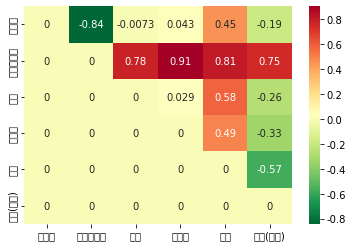

In [47]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
# sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# ****6-8. 프로젝트 : 모든 장르 간 편향성 측정해 보기****

지금까지 우리는 영화 시놉시스 코퍼스를 가지고 영화 구분과 영화 장르 간에 내재된 편향성을 측정하는 작업을 진행해 보았습니다. 어느 정도는 우리의 상식과 일치하는 편향성이 측정되었을 것입니다.

이번에는 모든 장르에 대해 영화 구분과의 편향성 정도를 측정해 보겠습니다. 대부분의 과정은 이전 스텝에서 이미 진행한 내용을 참고해서 동일하게 진행 가능할 것입니다.

****라이브러리 버전을 확인해 봅니다****

In [48]:
import time

def logging_time(original_fn):
    def wrapper_fn(*args, **kwargs):
        start_time = time.time()
        result = original_fn(*args, **kwargs)
        end_time = time.time()
        print("WorkingTime[{}]: {} sec".format(original_fn.__name__, end_time-start_time))
        return result
    return wrapper_fn

# @logging_time

In [49]:
import konlpy
import gensim
import sklearn
import seaborn

print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.6.0
4.1.2
1.0.2
0.11.2


STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [50]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import os
from gensim.models import KeyedVectors
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

from konlpy.tag import Okt
okt = Okt()
tokenized = []

from pathlib import Path
data_dir = Path.joinpath(Path.cwd(),'data')


In [51]:
## word2vec.model 화일이 만들어지지 않았다면 아래 코드를 실행하세요
# synopsis_dir = Path.joinpath(data_dir,'synopsis.txt')
# with open(synopsis_dir, 'r', encoding='UTF-8') as file:
#     while True:
#         line = file.readline()
#         if not line: break
#         words = okt.pos(line, stem=True, norm=True)
#         res = []
#         for w in words:
#             if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
#                 res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
#         tokenized.append(res)

In [52]:
# print(len(tokenized))

STEP 2. 추출된 결과로 embedding model 만들기

In [53]:
from gensim.models import Word2Vec

## word2vec.model 화일이 만들어지지 않았다면 아래 코드를 실행하세요
## tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
## Initialize a model with e.g.:
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)
# model.save("word2vec.model") ### 추가한 코드


## word2vec.model 화일을 불러들입니다.
model = Word2Vec.load("word2vec.model")

In [54]:
model.wv.most_similar(positive=['영화'])

[('작품', 0.8913386464118958),
 ('다큐멘터리', 0.8423609137535095),
 ('영화로', 0.8113700151443481),
 ('드라마', 0.8073851466178894),
 ('영상', 0.7853281497955322),
 ('감동', 0.7805281281471252),
 ('주제', 0.7801504731178284),
 ('형식', 0.7801069617271423),
 ('코미디', 0.777069091796875),
 ('실화', 0.7769163250923157)]

In [55]:
model.wv.most_similar(positive=['사랑'])

[('진심', 0.6978300213813782),
 ('행복', 0.6966670155525208),
 ('만남', 0.6951174139976501),
 ('애정', 0.6918906569480896),
 ('첫사랑', 0.6837601065635681),
 ('가슴', 0.6734590530395508),
 ('우정', 0.6706499457359314),
 ('감정', 0.6698275208473206),
 ('운명', 0.6689521670341492),
 ('아픔', 0.6689003109931946)]

In [56]:
model.wv.most_similar(positive=['연극'])

[('시나리오', 0.8784323334693909),
 ('오페라', 0.8727848529815674),
 ('영화감독', 0.8714578747749329),
 ('영감', 0.8705026507377625),
 ('배우', 0.8655096888542175),
 ('뮤지션', 0.864478349685669),
 ('캐스팅', 0.8566581606864929),
 ('각색', 0.8530789613723755),
 ('곡', 0.8524932861328125),
 ('데뷔', 0.8522984385490417)]

****STEP 3. target, attribute 단어 셋 만들기****

이전 스텝에서는 TF-IDF를 사용해서 단어 셋을 만들었습니다. 이 방법으로도 어느 정도는 대표 단어를 잘 선정할 수 있습니다. 그러나 TF-IDF가 높은 단어를 골랐음에도 불구하고 중복되는 단어가 발생하는 문제가 있었습니다. 개념축을 표현하는 단어가 제대로 선정되지 않은 것은 WEAT 계산 결과에 악영향을 미칩니다.

TF-IDF를 적용했을 때의 문제점이 무엇인지 지적 가능하다면 그 문제점을 지적하고 스스로 방법을 개선하여 대표 단어 셋을 구축해 보기 바랍니다. TF-IDF 방식을 쓰더라도 중복된 단어를 잘 제거하면 여전히 유용한 방식이 될 수 있습니다.

3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기  

KOBIS에서 제공한 정보를 기준으로  

영화 구분  
synopsis_art.txt : 예술영화  
synopsis_gen.txt : 일반영화(상업영화)  
그 외는 독립영화 등으로 분류됩니다.  

예술영화와 일반영화(상업영화)라는 영화를 attribute

드라마 장르와 액션 장르라는 장르구분을 target

'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출하여 art, gen 변수에 할당

In [57]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
#     with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
    with open(Path.joinpath(data_dir,file_name), 'r', encoding='UTF-8') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [58]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다.
genre_list_hangul_A_B =['예술영화', '상업영화']
genre_list_A_B = ['art', 'gen']

In [59]:
def make_file_name(genre):
    return 'synopsis_'+ genre + '.txt'

In [60]:
data_file_name_list_A_B = list(map(make_file_name, genre_list_A_B))
data_file_name_list_A_B

['synopsis_art.txt', 'synopsis_gen.txt']

In [61]:
genre_token_listt_A_B = list(map(read_token, data_file_name_list_A_B))  # 시간이 많이 걸림

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


TF-IDF방식을 사용

코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정 TF-IDF에 관한 내용이 궁금하신 분은 위키독스 를 참고 https://wikidocs.net/31698

In [62]:
vectorizer = TfidfVectorizer()
X_A_B = vectorizer.fit_transform(genre_token_listt_A_B)
print(X_A_B.shape)

(2, 41082)


In [63]:
m1 = X_A_B[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X_A_B[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')
    
print('상업영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

상업영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [64]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
attributes_art, attributes_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): attributes_art.append(w1_[i])
    if len(attributes_art) == n: break 

# w2에만 있고 w1에는 없는, 상업영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): attributes_gen.append(w2_[i])
    if len(attributes_gen) == n: break


In [65]:
print(attributes_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [66]:
print(attributes_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


In [67]:
genre_name =['가족', '공상과학', '공연', '공포_호러', '기타', '다큐멘터리', '드라마', '멜로로맨스',  '뮤지컬', '미스터리', 
 '범죄', '서부극', '성인물', '스릴러', '사극', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']
genre_list = ['family', 'SF', 'show', 'horror', 'etc', 'documentary', 'drama', 'romance', 'musical', 'mystery',   
 'crime', 'western', 'adult', 'thriller', 'historical', 'animation', 'action', 'adventure', 'war', 'comedy', 'fantasy']

## 테스트를 위한 짧은 리스트
# genre_name =['가족', '공상과학', '공연']
# genre_list = ['family', 'SF', 'show']

In [68]:
genre_txt = list(map(make_file_name, genre_list))
genre_txt

['synopsis_family.txt',
 'synopsis_SF.txt',
 'synopsis_show.txt',
 'synopsis_horror.txt',
 'synopsis_etc.txt',
 'synopsis_documentary.txt',
 'synopsis_drama.txt',
 'synopsis_romance.txt',
 'synopsis_musical.txt',
 'synopsis_mystery.txt',
 'synopsis_crime.txt',
 'synopsis_western.txt',
 'synopsis_adult.txt',
 'synopsis_thriller.txt',
 'synopsis_historical.txt',
 'synopsis_animation.txt',
 'synopsis_action.txt',
 'synopsis_adventure.txt',
 'synopsis_war.txt',
 'synopsis_comedy.txt',
 'synopsis_fantasy.txt']

In [69]:
#  시간이 많이 걸림
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_family.txt 파일을 읽고 있습니다.
synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [70]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [71]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)

target = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    targ = []
    j = 0
    while (len(targ) < 15):
        if vectorizer.get_feature_names_out()[w[i][j][0]] in model.wv:
            targ.append(vectorizer.get_feature_names_out()[w[i][j][0]])
            print(vectorizer.get_feature_names_out()[w[i][j][0]], end=', ')
        j += 1
    target.append(targ)
    print()

가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공상과학: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포_호러: 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
서부극: 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물: 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 시작, 위해, 사람, 살인, 남자, 발견, 아내, 경찰, 친구, 모든, 사실, 살해, 
역사: 조선, 위해, 시작, 신기전, 사랑, 자신

장르를 대표하는 단어들을 추출함

4. embedding model과 단어 셋으로 WEAT score 구해보기

WEAT_score

In [72]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

In [73]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev


In [74]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [75]:
A = np.array([model.wv[word] for word in attributes_art]) # A에 예술영화
B = np.array([model.wv[word] for word in attributes_gen]) # B에 상업영화

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in target[i]]) # X에 행 한줄을 차지할 영화
        Y = np.array([model.wv[word] for word in target[j]]) # Y에 그 행의 열을 차지할 영화를 넣었다.
        matrix[i][j] = weat_score(X, Y, A, B)

### WEAT score가 0.8 이상, -0.8 이하의 경우만 해석  

In [76]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])
        if abs(matrix[i][j])>= 0.8:
            print('{} 영화와 {} 영화의 예술영화와 상업영화, WEAT score의 의미를 해석해보면'.format(genre_name[i], genre_name[j]))
            if matrix[i][j] > 0:
                print('{} 영화는 예술영화,  {} 영화는 상업영화에 가깝다고 볼 수 있습니다.\n'.format(genre_name[i], genre_name[j]))
            else:
                print('{} 영화는 상업영화,  {} 영화는 예술영화에 가깝다고 볼 수 있습니다.\n'.format(genre_name[i], genre_name[j]))                
        else:
            print('\n')

가족 공상과학 0.39297372


가족 공연 0.09729914


가족 공포_호러 -0.093615025


가족 기타 0.5836248


가족 다큐멘터리 0.8323073
가족 영화와 다큐멘터리 영화의 예술영화와 상업영화, WEAT score의 의미를 해석해보면
가족 영화는 예술영화,  다큐멘터리 영화는 상업영화에 가깝다고 볼 수 있습니다.

가족 드라마 0.09727687


가족 멜로로맨스 -0.59010696


가족 뮤지컬 0.5204221


가족 미스터리 -0.26490104


가족 범죄 0.20668289


가족 서부극 0.14503407


가족 성인물 -0.28951374


가족 스릴러 -0.11973964


가족 역사 -0.024079813


가족 애니메이션 0.5711357


가족 액션 0.09409775


가족 어드벤처 -0.0166326


가족 전쟁 0.5293248


가족 코미디 0.11191825


가족 판타지 0.25717425


공상과학 공연 -0.35849747


공상과학 공포_호러 -0.74545425


공상과학 기타 0.35614812


공상과학 다큐멘터리 0.7085295


공상과학 드라마 -0.28625903


공상과학 멜로로맨스 -1.3598889
공상과학 영화와 멜로로맨스 영화의 예술영화와 상업영화, WEAT score의 의미를 해석해보면
공상과학 영화는 상업영화,  멜로로맨스 영화는 예술영화에 가깝다고 볼 수 있습니다.

공상과학 뮤지컬 0.2881908


공상과학 미스터리 -0.9841088
공상과학 영화와 미스터리 영화의 예술영화와 상업영화, WEAT score의 의미를 해석해보면
공상과학 영화는 상업영화,  미스터리 영화는 예술영화에 가깝다고 볼 수 있습니다.

공상과학 범죄 -0.30405378


공상과학 서부극 -0.40596345


공상과학 성인물 -0.9360215
공상과학 영화와 성인물 영화의 예술영화와 상업영화, WEAT score의 의미를 해석해보면
공상과

In [78]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        matrix[j][i] = - matrix[i][j] # 비어있는 부분을 채워줍니다.


****STEP 4. WEAT score 계산과 시각화****

영화 구분, 영화 장르에 따른 편향성을 측정하여 WEAT score로 계산해 보고 이를 Heatmap 형태로 시각화해 봅시다. 편향성이 두드러지는 영화장르 target 구성에는 어떤 케이스가 있는지 시각적으로 두드러지게 구성되면 좋습니다.

<AxesSubplot:title={'center':'Compare genres of art or commercial films \n (higher value  is  more closed to art film)'}>

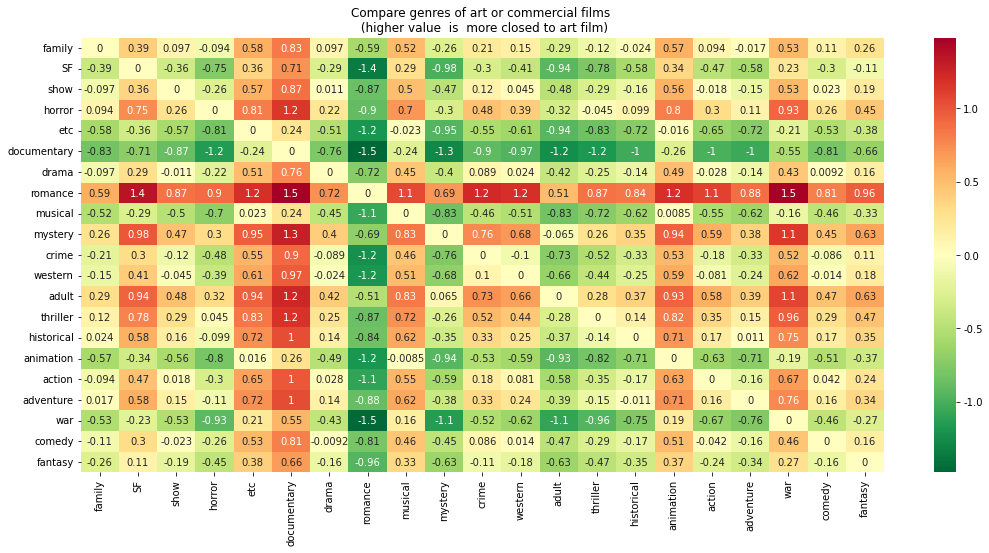

In [79]:
# -*- coding: UTF-8 -*-
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(18,8))
plt.title('Compare genres of art or commercial films \n (higher value  is  more closed to art film)')
ax = sns.heatmap(matrix, xticklabels=genre_list, yticklabels=genre_list, annot=True,  cmap='RdYlGn_r')
ax

## 후기 :  
### 교재 따라하다 혼돈만 증가했다. 왜 이렇게 설명해야 했을까 왜 이렇게 코딩을 했을까 다시 생각해보는 계기가 되었다.  
### 식을 설명하는 논문 30줄 정도 읽고 나름 대로 정리를 하고 코딩을 수정했다.  
###  attribute words A, B에 예술영화와 상업영화를 넣고 X, Y에는 다양한 장르를 넣어서 특정장르가 예술영화와 상업영화 어느쪽에 가까운지 계산 하였다. (LMS 교재는 X, Y에 예술영화와 상업영화를 넣었다)  
###  표 보는 법이 좀 애매한데 좌측에 있는 장르와 하단에 있는 장르를 비교해서 좌측에 있는 장르가 예술영화에 가까운가(양수) 또는 상업영화에 가까운가(음수)를 표시한 것이다.  
### 로맨스 장르는 다른 장르에 비해서 빈번하게 나타나는 단어들만으로 따지면 점수가 높아서 예술영화쪽으로 분류되는 성향이 강하게 나타난다.  
### 의외로 다큐멘터리가 상업영화에 가깝게 나타났다.  
### WEAT score가 0.8 이상, -0.8 이하의 경우만 해석.  코드실행결과 출력(out[76])이 길어서 그런지 깃허브에서 보이지 않는다. 코드를 다운받으면 볼 수 있다.

#### 관련논문 날림 파파고 번역
https://arxiv.org/pdf/1608.07187.pdf 9페이지


WEAT(Word Embedding Association Test)
편견을 입증하고 정량화하기 위해 permutation test를 사용합니다. IAT 문헌에서 용어를 차용하여 두 가지 세트를 고려합니다.
**대상 단어**(**target words**)(**예: 프로그래머, 엔지니어, 과학자, ... 및 간호사, 교사, 사서**, ...)와 두 세트의 **속성 단어(attribute words) (예: 남자, 남자, ..., 여자, 여자...)(e.g., man, male, ... and woman, female ...)** 귀무 가설은 두 대상 집합 사이에 차이가 없다는 것입니다.
두 가지 속성 단어 세트와의 상대적 유사성 측면에서 단어. permutation test은 다음과 같은 가능성을 측정합니다.
속성 단어(attribute words)의 무작위 순열이 관찰된 것을 만들어 낼 확률을 계산함으로써 귀무 가설 표본 평균의 차이(또는 그 이상)입니다.
형식적인 용어로 **X와 Y를 같은 크기**의 **대상 단어 타깃 워드**의 두 세트, **A와 B를 속성 단어**의 두 세트라고 합니다. cos($a^→$, $b^→$)는 벡터 $a^→$와  $b^→$ 사이 각도의 코사인입니다.

$$
s(X,Y,A,B) = ∑_{
x∈X}
s(x,A,B)− ∑_{
y∈Y}
s(y,A,B)
$$

여기서

$$
s(w,A,B)=mean_{a∈A}cos(w^→,a^→)−mean_{b∈B}cos(w^→,b^→)
$$

즉, s(w,A,B)는 단어 w와 속성과의 관련성을 측정하고 s(X,Y,A,B)는 두 세트의 표적 단어와 속성과의 차이 값을 측정합니다. 

$\{(X_i, Y_i)\}_i$ 는  $X \cup Y$ 의 모든 파티션을 동일한 크기의 두 집합으로 나타낸다고 합시다. permutation test의 one-sided p-value는 

$$
Pr_i[s(X_i, Y_i, A, B) > s(X, Y, A, B)]
$$

effect size 는

$$
{mean_{x∈X}s(x,A,B)−mean_{y∈Y}s(y,A,B)}\over{std_{w∈X∪Y}s(w,A,B)}
$$

이것은 두 분포(목표값과 속성 사이의 연관성)가 얼마나 분리되어 있는지에 대한 정규화된 측도입니다.

이러한 p-values와 effect sizes가 IAT와 동일한 해석을 가지고 있지 않음을 다시 설명합니다. 모델의 '대상'은 실험에 쓰인 단어들(words)을 뜻하는 것이지 사람이 아니다.  IAT는 단일 대상 쌍 간의 차등 연관성(differential association between a single pair of target concepts and an attribute)을 측정할 수 있지만, WEAT는 개념과 속성, 두 세트의 target concepts과  attribute 사이의 차이 연관성(differential association between two sets of target concepts and an attribute)만 측정할 수 있습니다.